In [3]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

nltk.download("twitter_samples")

import sys
sys.path.append("../")
from text_preprocessing import build_word_frequencies, process_tweet

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/mbarbaric/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


## Import twitter samples

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


## Build labels

In [5]:
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

## Build word frequencies

In [7]:
freqs = build_word_frequencies(tweets, labels)

## Table of word counts

In [8]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

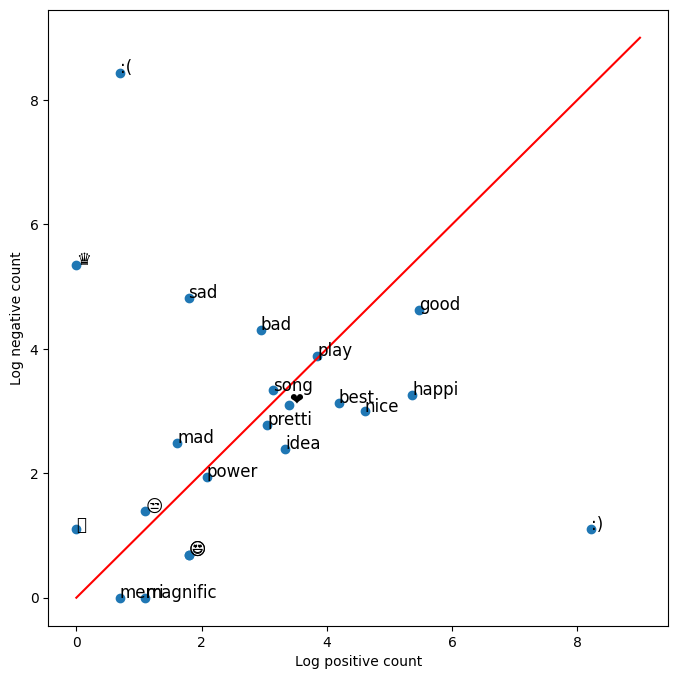

In [14]:
fig, aux = plt.subplots(figsize = (8,8))

x = np.log([x[1] + 1 for x in data])
y = np.log([y[2] + 1 for y in data])

aux.scatter(x,y)
plt.xlabel("Log positive count")
plt.ylabel("Log negative count")

for i in range(len(data)):
    aux.annotate(data[i][0], (x[i], y[i]), fontsize=12)

aux.plot([0,9],[0,9],color='red')
plt.show()